In [1]:
# Import library
import joblib
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from zipfile import ZipFile
import matplotlib.pyplot as plt

In [2]:
# !kaggle datasets download -d imuhammad/course-reviews-on-coursera

^C


In [ ]:
# zip_ref = ZipFile('course-reviews-on-coursera.zip')
# zip_ref.extractall("/content")
# zip_ref.close()

In [16]:
courses_df = pd.read_csv(r'D:\Recommender_System_Courses_web\dataset\Coursera_courses.csv')
reviews_df = pd.read_csv(r'D:\Recommender_System_Courses_web\dataset\Coursera_reviews.csv')

# Courses

In [17]:
courses_df.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [18]:
courses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [19]:
courses_df.describe()

,name,institution,course_url,course_id
count,623,623,623,623
unique,622,134,623,623
top,Introduction to Psychology,University of Pennsylvania,https://www.coursera.org/learn/machine-learning,machine-learning
freq,2,43,1,1


In [20]:
courses_df.duplicated().sum()

0

# Reviews

In [21]:
reviews_df.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [22]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454558 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [23]:
reviews_df.describe(include='all')

,reviews,reviewers,date_reviews,rating,course_id
count,1454558,1454711,1454711,1.454711e+06,1454711
unique,458276,287808,1892,NaN,604
top,good,By Deleted A,"May 25, 2020",NaN,python
freq,8827,5412,5394,NaN,45218
mean,NaN,NaN,NaN,4.696649e+00,NaN
std,NaN,NaN,NaN,6.983271e-01,NaN
min,NaN,NaN,NaN,1.000000e+00,NaN
25%,NaN,NaN,NaN,5.000000e+00,NaN
50%,NaN,NaN,NaN,5.000000e+00,NaN
75%,NaN,NaN,NaN,5.000000e+00,NaN


In [24]:
reviews_df.duplicated().sum()

934764

In [25]:
reviews_df.isnull().sum()

reviews         153
reviewers         0
date_reviews      0
rating            0
course_id         0
dtype: int64

In [26]:
unknown_reviewer_df = reviews_df[~(reviews_df['reviewers'].str.startswith('By'))]
unknown_reviewer_df

,reviews,reviewers,date_reviews,rating,course_id
732410,The ethics unit examples were interesting. Th...,Started Oct 05,"Sep 09, 2020",4,intro-to-healthcare
732413,Wonderfully done,Started Oct 05,"Sep 29, 2020",4,intro-to-healthcare
1046787,My certificate does not want to be released,Started Sep 28,"Jul 20, 2020",1,entrepreneurship-strategy
1046790,knowing who you are? give me a break...,Started Sep 28,"May 01, 2019",1,entrepreneurship-strategy
1236372,"boring lecturer, monotone, passionless reading...",No Upcoming Session Available,"Mar 22, 2016",1,epigenetics
1236375,the whole lecture given by the lecturer is so ...,No Upcoming Session Available,"Jul 31, 2017",1,epigenetics
1259484,hola! me gustaría darme de baja de este curso....,Started Oct 05,"Sep 09, 2020",1,social-economic-networks
1259487,"Without previous knowledge in math, this cours...",Started Oct 05,"Oct 27, 2018",1,social-economic-networks
1262903,How can you attend yo course which does not up...,Started Oct 05,"Jun 28, 2020",1,curanderismo-plants
1262906,"The course is not what I expected, and I would...",Started Oct 05,"Oct 02, 2019",1,curanderismo-plants


In [27]:
num_of_reviews_by_course_df = reviews_df['course_id'].value_counts().reset_index()
more_500_reviews_df = num_of_reviews_by_course_df[num_of_reviews_by_course_df['count'] > 500]
more_500_reviews_df

,course_id,count
0,python,45218
1,machine-learning,35895
2,neural-networks-deep-learning,35750
3,technical-support-fundamentals,35319
4,python-data,33546
...,...,...
413,getting-started-with-google-sheets,517
414,quality-healthcare,516
415,process-mining,514
416,international-taxation,513


# Data Cleaning

In [15]:
new_reviews_df = reviews_df[['reviewers','rating','course_id']].copy()

# Ambil kursus yang hanya memiliki lebih dari 500 reviews
new_reviews_df = new_reviews_df[new_reviews_df['course_id']\
                                .isin(set(more_500_reviews_df['course_id']))]

# Ambil data yang reviewernya diawali dengan 'By' kecuali 'By Deleted A'
new_reviews_df = new_reviews_df[(new_reviews_df['reviewers'].str.contains('By')) &
                                (new_reviews_df['reviewers']!='By Deleted A')]

# Hapus data yang memiliki nilai null
new_reviews_df.dropna(inplace=True)

# Hapus data duplikat
new_reviews_df.drop_duplicates(inplace=True)

new_reviews_df.head()

,reviewers,rating,course_id
87,By James R,1,financial-markets-global
88,By Sanam P,1,financial-markets-global
89,By Brendan F,1,financial-markets-global
90,By Eli,1,financial-markets-global
91,By Sebastian S,1,financial-markets-global


In [16]:
new_reviews_df['reviewers'] = new_reviews_df['reviewers']\
                      .apply(lambda x: ' '.join(x.split(' ')[1:]))
new_reviews_df.head()

,reviewers,rating,course_id
87,James R,1,financial-markets-global
88,Sanam P,1,financial-markets-global
89,Brendan F,1,financial-markets-global
90,Eli,1,financial-markets-global
91,Sebastian S,1,financial-markets-global


In [17]:
new_reviews_df.shape

(493484, 3)

In [18]:
new_reviews_df['course_id'].nunique()

418

Data Preparation

In [19]:
merged_df = pd.merge(courses_df[['name','course_url','course_id']],
                     new_reviews_df,
                     on='course_id')

merged_df.head()

,name,course_url,course_id,reviewers,rating
0,Machine Learning,https://www.coursera.org/learn/machine-learning,machine-learning,Bruno C,1
1,Machine Learning,https://www.coursera.org/learn/machine-learning,machine-learning,Fadi,1
2,Machine Learning,https://www.coursera.org/learn/machine-learning,machine-learning,Mathew L,1
3,Machine Learning,https://www.coursera.org/learn/machine-learning,machine-learning,Rui C,1
4,Machine Learning,https://www.coursera.org/learn/machine-learning,machine-learning,Mehdi A,1


In [20]:
data_prep_df = merged_df.copy()

users_list = data_prep_df['reviewers'].unique().tolist()
courses_list = data_prep_df['course_id'].unique().tolist()

# Encode users dan courses
users_encoded = {user: i+1 for i, user in enumerate(users_list)}
courses_encoded = {course: i+1 for i, course in enumerate(courses_list)}

# Decode users dan courses
users_decoded = {i+1: user for i, user in enumerate(users_list)}
courses_decoded = {i+1: course for i, course in enumerate(courses_list)}

In [21]:
data_prep_df['user_id'] = data_prep_df['reviewers'].map(users_encoded)
data_prep_df['course_id'] = data_prep_df['course_id'].map(courses_encoded)

data_prep_df.head()

,name,course_url,course_id,reviewers,rating,user_id
0,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Bruno C,1,1
1,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Fadi,1,2
2,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Mathew L,1,3
3,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Rui C,1,4
4,Machine Learning,https://www.coursera.org/learn/machine-learning,1,Mehdi A,1,5


In [22]:
data_prep_df.to_csv('data_prep.csv', index=False)

In [23]:
# Mendapatkan jumlah user
num_users = len(users_encoded)

# Mendapatkan jumlah kursus
num_courses = len(courses_encoded)

# Mengubah rating menjadi nilai float
data_prep_df['rating'] = data_prep_df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(data_prep_df['rating'])

# Nilai maksimal rating
max_rating = max(data_prep_df['rating'])

print(f'Number of User: {num_users}\nNumber of Course: {num_courses}\nMin Rating: {min_rating}\nMax Rating: {max_rating}')

Number of User: 281001
Number of Course: 418
Min Rating: 1.0
Max Rating: 5.0


In [24]:
data_prep_df = data_prep_df.sample(frac=1, random_state=42)
data_prep_df.head()

,name,course_url,course_id,reviewers,rating,user_id
260196,Gamification,https://www.coursera.org/learn/gamification,99,Valery L,5.0,87097
419467,Version Control with Git,https://www.coursera.org/learn/version-control...,292,Brayan Y M C,5.0,246863
415296,Econometrics: Methods and Applications,https://www.coursera.org/learn/erasmus-econome...,286,Mrinal,5.0,42197
191024,Customer Analytics,https://www.coursera.org/learn/wharton-custome...,50,Xinmiao Z,5.0,133760
448144,The Technology of Music Production,https://www.coursera.org/learn/technology-of-m...,332,Suryadeep D,5.0,91252


In [25]:
final_rating_df = data_prep_df[['name', 'course_url','rating', 'course_id']].copy()
final_rating_df = final_rating_df.groupby(['name',
                                           'course_url',
                                           'course_id']
                                          )['rating'].mean().reset_index()
final_rating_df['rating'] = round(final_rating_df['rating'], 2)
final_rating_df.head()

,name,course_url,course_id,rating
0,A Law Student's Toolkit,https://www.coursera.org/learn/law-student,307,4.68
1,AI For Everyone,https://www.coursera.org/learn/ai-for-everyone,9,4.84
2,AI for Medical Diagnosis,https://www.coursera.org/learn/ai-for-medical-...,184,4.58
3,AWS Fundamentals: Addressing Security Risk,https://www.coursera.org/learn/aws-fundamental...,353,4.16
4,AWS Fundamentals: Going Cloud-Native,https://www.coursera.org/learn/aws-fundamental...,118,4.68


In [26]:
final_rating_df.to_csv('final_rating_df.csv', index=False)

# Data Splitting

In [27]:
final_df = data_prep_df.copy()

x = final_df[['user_id', 'course_id']].values

y = final_df['rating'].apply(lambda x:\
    (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 98% data train dan 2% data validasi
train_indices = int(0.90 * final_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)


[[ 87097     99]
 [246863    292]
 [ 42197    286]
 ...
 [ 15531     26]
 [110133     28]
 [ 47531     23]] [1. 1. 1. ... 1. 1. 1.]


In [28]:
from sklearn.ensemble import IsolationForest

X_combined = np.hstack((x, y.reshape(-1, 1)))
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_combined)

y_pred = iso_forest.predict(X_combined)

outliers_index = np.where(y_pred == -1)[0]
print("Indeks data anomali:", outliers_index)


Indeks data anomali: [    43    389    453 ... 493252 493311 493458]


In [29]:
final_df_cleaned = final_df.drop(outliers_index)
final_df_cleaned.reset_index(drop=True, inplace=True)

print(f"Jumlah data sebelum menghapus anomali: {final_df.shape[0]}")
print(f"Jumlah data setelah menghapus anomali: {final_df_cleaned.shape[0]}")

Jumlah data sebelum menghapus anomali: 493484
Jumlah data setelah menghapus anomali: 488554


In [30]:
final_df_cleaned = final_df_cleaned.copy()

x = final_df_cleaned[['user_id', 'course_id']].values

y = final_df_cleaned['rating'].apply(lambda x:\
    (x - min_rating) / (max_rating - min_rating)).values

#Membagi menjadi 90% data train dan 10% data validasi
train_indices = int(0.90 * final_df_cleaned.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)
print("Jumlah data training:", len(x_train))
print("Jumlah data validasi:", len(x_val))

[[ 87097     99]
 [246863    292]
 [ 42197    286]
 ...
 [221799    208]
 [110133     28]
 [ 47531     23]] [1. 1. 1. ... 1. 1. 1.]
Jumlah data training: 439698
Jumlah data validasi: 48856


In [31]:
print("Jumlah data training:", len(x_train))
print("Jumlah data validasi:", len(x_val))

Jumlah data training: 439698
Jumlah data validasi: 48856


# Modeling

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

# kf = KFold(n_splits=5)
# for train_index, val_index in kf.split(x):
#     x_train, x_val = x[train_index], x[val_index]
#     y_train, y_val = y[train_index], y[val_index]

# RMSE metric
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# RMSECallback class
class RMSECallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        train_rmse = np.sqrt(logs.get('loss'))
        val_rmse = np.sqrt(logs.get('val_loss'))
        # print(f"Epoch {epoch+1} - RMSE: {train_rmse:.4f}, Val RMSE: {val_rmse:.4f}")


class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_courses, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)

    self.num_users = num_users
    self.num_courses = num_courses
    self.embedding_size = embedding_size

    # Matrix Factorization (MF) Embeddings
    self.user_embedding_mf = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=tf.keras.regularizers.l2(1e-4)
    )
    self.user_bias_mf = layers.Embedding(num_users, 1)
    self.courses_embedding_mf = layers.Embedding(
        num_courses,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=tf.keras.regularizers.l2(1e-4)
    )
    self.courses_bias_mf = layers.Embedding(num_courses, 1)

    # Neural Network (NN) Embeddings
    self.user_embedding_nn = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=tf.keras.regularizers.l2(1e-4)
    )
    self.courses_embedding_nn = layers.Embedding(
        num_courses,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=tf.keras.regularizers.l2(1e-4)
    )

    # Neural Network Layers
    self.dense1 = layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))
    self.batch_norm1 = layers.BatchNormalization()
    self.dropout1 = layers.Dropout(0.5)
    self.dense2 = layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))
    self.batch_norm2 = layers.BatchNormalization()
    self.dropout2 = layers.Dropout(0.5)
    # self.dense3 = layers.Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))
    # self.batch_norm3 = layers.BatchNormalization()
    # self.dropout3 = layers.Dropout(0.5)


    # Output Layer
    self.output_layer = layers.Dense(1, activation='sigmoid')


  def call(self, inputs):
    user_vector_mf = self.user_embedding_mf(inputs[:, 0])
    user_bias_mf = self.user_bias_mf(inputs[:, 0])
    courses_vector_mf = self.courses_embedding_mf(inputs[:, 1])
    courses_bias_mf = self.courses_bias_mf(inputs[:, 1])

    dot_user_courses_mf = tf.tensordot(user_vector_mf, courses_vector_mf, axes=2)
    x_mf = dot_user_courses_mf + user_bias_mf + courses_bias_mf

    user_vector_nn = self.user_embedding_nn(inputs[:, 0])
    courses_vector_nn = self.courses_embedding_nn(inputs[:, 1])

    user_vector_nn = tf.keras.layers.Flatten()(user_vector_nn)
    courses_vector_nn = tf.keras.layers.Flatten()(courses_vector_nn)

    concat_nn = tf.keras.layers.Concatenate()([user_vector_nn, courses_vector_nn])

    x_nn = self.dense1(concat_nn)
    x_nn = self.batch_norm1(x_nn)
    x_nn = self.dropout1(x_nn)
    x_nn = self.dense2(x_nn)
    x_nn = self.batch_norm2(x_nn)
    x_nn = self.dropout2(x_nn)
    # x_nn = self.dense3(x_nn)
    # x_nn = self.batch_norm3(x_nn)
    # x_nn = self.dropout3(x_nn)


    concat_mf_nn = tf.keras.layers.Concatenate()([x_mf, x_nn])
    concat_mf_nn = self.dropout2(concat_mf_nn)

    output = self.output_layer(concat_mf_nn)

    return output

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [33]:
max_user_id = max(np.max(x_train[:, 0]), np.max(x_val[:, 0]))
max_course_id = max(np.max(x_train[:, 1]), np.max(x_val[:, 1]))

print(f"Max user ID: {max_user_id}, Max course ID: {max_course_id}")

num_users = max_user_id + 1
num_courses = max_course_id + 1

print(f"Num users: {num_users}, Num courses: {num_courses}")

x_train = np.clip(x_train, 0, [num_users - 1, num_courses - 1])
x_val = np.clip(x_val, 0, [num_users - 1, num_courses - 1])

embedding_size = 50

model = RecommenderNet(num_users, num_courses, embedding_size)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='mse',
    metrics=[rmse]
    )

history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=1024,
    epochs=25,
    validation_data=(x_val, y_val),
    callbacks=[RMSECallback(),early_stopping]
)


Max user ID: 281001, Max course ID: 418
Num users: 281002, Num courses: 419
Epoch 1/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 140s 312ms/step - loss: 0.1878 - rmse: 0.3834 - val_loss: 0.0621 - val_rmse: 0.1930
Epoch 2/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 135s 313ms/step - loss: 0.0550 - rmse: 0.1810 - val_loss: 0.0479 - val_rmse: 0.1838
Epoch 3/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 137s 318ms/step - loss: 0.0449 - rmse: 0.1798 - val_loss: 0.0413 - val_rmse: 0.1834
Epoch 4/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 136s 316ms/step - loss: 0.0396 - rmse: 0.1808 - val_loss: 0.0376 - val_rmse: 0.1829
Epoch 5/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 137s 319ms/step - loss: 0.0361 - rmse: 0.1802 - val_loss: 0.0353 - val_rmse: 0.1826
Epoch 6/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 138s 322ms/step - loss: 0.0343 - rmse: 0.1806 - val_loss: 0.0340 - val_rmse: 0.1825
Epoch 7/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 135s 315ms/step - loss: 0.0329 - rmse: 0.1804 - val_loss: 0.0330 - val_rmse: 0.1823
Epoch 8/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 135s 313ms/step 

Dataset URL: https://www.kaggle.com/datasets/imuhammad/course-reviews-on-coursera
License(s): GPL-2.0



  0%|          | 0.00/33.1M [00:00<?, ?B/s]
  3%|▎         | 1.00M/33.1M [00:04<02:33, 220kB/s]
  3%|▎         | 1.00M/33.1M [00:20<02:33, 220kB/s]
  6%|▌         | 2.00M/33.1M [00:23<06:44, 80.7kB/s]
  6%|▌         | 2.00M/33.1M [00:40<06:44, 80.7kB/s]
  9%|▉         | 3.00M/33.1M [00:58<11:40, 45.1kB/s]
  9%|▉         | 3.00M/33.1M [01:10<11:40, 45.1kB/s]
 12%|█▏        | 4.00M/33.1M [01:15<10:01, 50.8kB/s]
 15%|█▌        | 5.00M/33.1M [01:25<07:49, 62.8kB/s]
 18%|█▊        | 6.00M/33.1M [01:34<06:22, 74.4kB/s]
 18%|█▊        | 6.00M/33.1M [01:50<06:22, 74.4kB/s]
 21%|██        | 7.00M/33.1M [02:01<07:55, 57.6kB/s]
 24%|██▍       | 8.00M/33.1M [02:20<07:44, 56.8kB/s]
 24%|██▍       | 8.00M/33.1M [02:30<07:44, 56.8kB/s]
 24%|██▍       | 8.00M/33.1M [1:03:31<3:19:27, 2.20kB/s]
Traceback (most recent call last):
  File "C:\Users\Tazkiiia\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\response.py", line 737, in _error_catcher
    yield
  File "C:\Users\Tazkiiia\AppDat

In [34]:
model.save('recommender_model.h5')

In [35]:
model.save('recommender_model.keras')

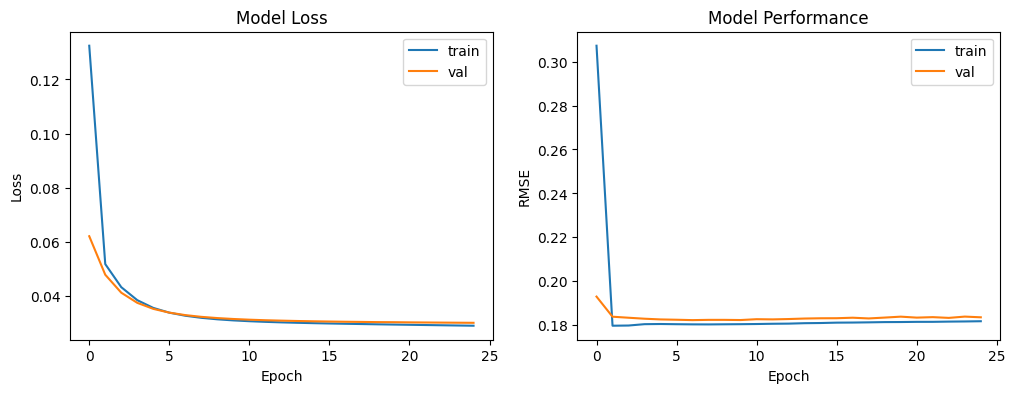

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['train', 'val'], loc='upper right')

ax[1].plot(history.history['rmse'])
ax[1].plot(history.history['val_rmse'])
ax[1].set_title('Model Performance')
ax[1].set_ylabel('RMSE')
ax[1].set_xlabel('Epoch')
ax[1].legend(['train', 'val'], loc='upper right')

plt.show()

# Recommeder System


In [37]:
def get_recommendations():
  user_id = int(input("Masukkan User ID (1 - 281001): "))
  if user_id <= num_users:
    reviewed_course_by_user = final_df[final_df.user_id == user_id]

    courses_not_reviewed = final_df[~(final_df.name
                                      .isin(reviewed_course_by_user.name.values)
                                      )]['course_id']
    courses_not_reviewed = list(
        set(courses_not_reviewed)
        .intersection(set(courses_decoded.keys()))
    )

    courses_not_reviewed = [[x] for x in courses_not_reviewed]
    user_courses_array = np.hstack(
        ([[user_id]] * len(courses_not_reviewed), courses_not_reviewed)
    )

    ratings = model.predict(user_courses_array, verbose=0).flatten()

    top_ratings_indices = ratings.argsort()[-10:][::-1]

    top_courses_user = reviewed_course_by_user.sort_values(
            by = 'rating',
            ascending=False
        ).head(10)

    if len(top_courses_user) >= 10:
        print('10 Kursus Teratas dengan rating tertinggi dari', users_decoded.get(user_id))
        print('-' * 24)
        print("| Course name : Rating |")
        print('-' * 24)
    else:
        num_of_courses = len(top_courses_user)
        print(num_of_courses, 'Kursus Teratas dengan rating tertinggi dari', users_decoded.get(user_id))
        print('-' * 24)
        print("| Course name : Rating |")
        print('-' * 24)

    for row in top_courses_user.itertuples():
        print(row.name, ':', row.rating)

    print("\nBerikut 10 kursus rekomendasi yang mungkin Anda sukai")

    recommended_courses = final_rating_df[final_rating_df['course_id']\
                                          .isin(top_ratings_indices)]

    top_10_recommended_courses = recommended_courses[['name',
                                                      'course_url',
                                                    'rating']].head(10)

    return top_10_recommended_courses
  else:
    print("ID user tidak ditemukan.")
    return get_recommendations()

In [38]:
recommended_courses = get_recommendations()
recommended_courses

8 Kursus Teratas dengan rating tertinggi dari Bruno C
------------------------
| Course name : Rating |
------------------------
Python Data Structures : 5.0
Wind Energy : 5.0
Fundamentals of Project Planning and Management : 5.0
Machine Learning : 5.0
Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning : 5.0
Fundamentos de Finanzas Empresariales : 5.0
Machine Learning Foundations: A Case Study Approach : 4.0
Machine Learning : 1.0

Berikut 10 kursus rekomendasi yang mungkin Anda sukai


,name,course_url,rating
30,Blockchain Basics,https://www.coursera.org/learn/blockchain-basics,4.50
137,Fundamentals of Quantitative Modeling,https://www.coursera.org/learn/wharton-quantit...,4.54
157,Google Cloud Platform Fundamentals: Core Infra...,https://www.coursera.org/learn/gcp-fundamentals,4.69
225,Introduction to Probability and Data with R,https://www.coursera.org/learn/probability-intro,4.60
253,Machine Learning,https://www.coursera.org/learn/machine-learning,4.73
276,Mind Control: Managing Your Mental Health Duri...,https://www.coursera.org/learn/manage-health-c...,4.82
358,Successful Negotiation: Essential Strategies a...,https://www.coursera.org/learn/negotiation-skills,4.80
389,Tools for Data Science,https://www.coursera.org/learn/open-source-too...,4.01
407,Vital Signs: Understanding What the Body Is Te...,https://www.coursera.org/learn/vital-signs,4.83
413,Writing in the Sciences,https://www.coursera.org/learn/sciwrite,4.92
